In [1]:
from self_supervised.pipelines.representation_model import RepresentationModel, YoloEncoder

%reload_kedro
model_description = catalog.load("yolov5_l_description")
trained_model = catalog.load("trained_model")
#encoder = YoloEncoder(model_description=model_description)
#trained_model = RepresentationModel(encoder=encoder)
trained_model = trained_model.eval()

2023-03-02 09:15:38,567 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/thop/profile.py:12: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) < LooseVersion("1.0.0"):

2023-03-02 09:15:38,567 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/thop/profile.py:68: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) >= LooseVersion("1.1.0"):

2023-03-02 09:15:38,762 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-03-02 09:15:38,763 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3

2023-03-02 09:15:39.036 | WARNING  | self_supervised.extras.datasets.pytorch_model_data_set:_load:42 - CUDA not available, automatically mapping variables to the CPU.


In [2]:
from pathlib import Path

dataset_path = Path("/home/daniel/lab_share/projects/CottonFlower2021/flower_dataset")
image_dir = dataset_path / "flower01" / "images"

In [3]:
from torchvision.io import read_image
from torchvision.transforms.functional import resize
from tqdm import tqdm
import torch

image_reps = []

image_list = sorted(list(image_dir.iterdir()))
for image_path in tqdm(image_list):
    image = read_image(image_path.as_posix())
    image.requires_grad = False
    image = resize(image, (512, 512))
    image = image.to(torch.float) / 255
    image_ex = image[None, :, :, :]
    
    image_reps.append(trained_model(image_ex)[0].detach().numpy())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 458/458 [01:11<00:00,  6.39it/s]


In [4]:
# Load flower counts.
import pandas as pd

labels_dir = dataset_path / "flower01" / "labels"
all_labels = []
labels_list = sorted(list(labels_dir.iterdir()))
for labels_path in labels_list:
    frame_labels = pd.read_csv(labels_path, sep=" ", names=["class", "x", "y", "width", "height"])
    frame_labels["frame"] = labels_path.name
    all_labels.append(frame_labels)
    
all_labels = pd.concat(all_labels, ignore_index=True)
all_labels

,class,x,y,width,height,frame
0,0,0.635938,0.238889,0.020833,0.037037,000001.txt
1,0,0.379427,0.065278,0.015104,0.034259,000001.txt
2,0,0.634375,0.245370,0.020833,0.037037,000002.txt
3,0,0.379948,0.068981,0.015104,0.034259,000002.txt
4,0,0.379948,0.069907,0.015104,0.034259,000003.txt
...,...,...,...,...,...,...
1987,0,0.495833,0.971759,0.030208,0.052778,000383.txt
1988,0,0.496875,0.976852,0.030208,0.046296,000384.txt
1989,0,0.497656,0.980093,0.028646,0.037963,000385.txt
1990,0,0.497135,0.986111,0.028646,0.027778,000386.txt


In [5]:
import numpy as np

# Create flower counts labels.
flower_counts = []
for image_path in labels_list:
    flower_counts.append(np.count_nonzero(all_labels["frame"] == image_path.name))
    
# Any missing counts are zeros.
for _ in range(len(flower_counts), len(image_reps)):
    flower_counts.append(0)

In [6]:
test_image_dir = dataset_path / "flower02" / "images"

test_image_reps = []

image_list = sorted(list(test_image_dir.iterdir()))
for image_path in tqdm(image_list):
    image = read_image(image_path.as_posix())
    image.requires_grad = False
    image = resize(image, (512, 512))
    image = image.to(torch.float) / 255
    image_ex = image[None, :, :, :]
    
    test_image_reps.append(trained_model(image_ex)[0].detach().numpy())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 333/333 [00:49<00:00,  6.68it/s]


In [7]:
test_labels_dir = dataset_path / "flower02" / "labels"
all_labels_test = []
labels_list = sorted(list(test_labels_dir.iterdir()))
for labels_path in labels_list:
    frame_labels = pd.read_csv(labels_path, sep=" ", names=["class", "x", "y", "width", "height"])
    frame_labels["frame"] = labels_path.name
    all_labels_test.append(frame_labels)
    
all_labels_test = pd.concat(all_labels_test, ignore_index=True)
all_labels_test

,class,x,y,width,height,frame
0,0,0.407813,0.032870,0.014583,0.023148,000001.txt
1,0,0.408854,0.042130,0.014583,0.023148,000002.txt
2,0,0.408854,0.042130,0.014583,0.023148,000003.txt
3,0,0.408854,0.042130,0.014583,0.023148,000004.txt
4,0,0.408854,0.042130,0.014583,0.023148,000005.txt
...,...,...,...,...,...,...
1583,0,0.441406,0.814352,0.020313,0.036111,000287.txt
1584,0,0.437240,0.838426,0.020313,0.036111,000288.txt
1585,0,0.433073,0.858796,0.020313,0.036111,000289.txt
1586,0,0.434635,0.871759,0.011979,0.028704,000290.txt


In [8]:
# Create flower counts.
test_flower_counts = []
for image_path in labels_list:
    test_flower_counts.append(np.count_nonzero(all_labels_test["frame"] == image_path.name))
    
# Any missing counts are zeros.
for _ in range(len(test_flower_counts), len(test_image_reps)):
    test_flower_counts.append(0)

In [9]:
# Create combined dataset.
all_image_reps = image_reps + test_image_reps
all_flower_counts = flower_counts + test_flower_counts
train_indices = np.arange(len(image_reps))
test_indices = np.arange(len(image_reps), len(all_image_reps))

In [10]:
from sklearn.linear_model import RidgeCV

all_flower_counts = np.array(all_flower_counts, dtype=float)
all_image_reps_arr = np.concatenate(all_image_reps, axis=0)

alphas = [1e-6, 1e-4, 0.01, 0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
reg = RidgeCV(alphas=alphas, cv=((train_indices, test_indices),)).fit(all_image_reps_arr, all_flower_counts)

2023-03-02 09:17:58,855 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.01319e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



In [11]:
test_image_reps_arr = np.concatenate(test_image_reps, axis=0)
test_preds = reg.predict(test_image_reps_arr)
test_preds

array([    0.49759,      1.0678,      1.2484,      1.0432,     0.78541,     0.53449,      1.3449,      1.1995,      1.2364,      1.2267,      1.4107,       1.481,      1.9401,      1.8896,      1.6845,      1.7975,      1.6495,      1.2223,      1.2426,      1.0381,     0.87396,      1.2143,      1.4723,      1.0823,
            1.7961,      2.2523,       2.304,      2.6779,       2.867,      2.8852,      3.1542,      3.1213,      2.9332,      3.0002,      3.0859,      3.3025,      4.0604,      3.6692,      3.6551,      4.0142,      3.9652,      4.0276,      3.8822,      4.1185,      4.1709,      4.5433,      4.2756,      4.3596,
            4.3811,      4.5571,      4.3595,      4.2403,      4.4815,      4.7614,      4.8183,      4.8666,      4.8949,      5.0354,      4.6892,      4.9237,       4.684,      4.8853,      4.7242,      5.0466,      4.9225,      5.1637,      5.0373,      4.9809,      4.9261,      4.8481,      4.8639,      4.9465,
            4.9813,       5.264,      5.1266,      5.4901,      5.4814,      5.3073,      5.1699,      5.4768,      5.7182,      5.5085,      5.4737,      6.1986,      5.8078,      5.6905,      5.7233,      5.9107,      5.6984,      5.9788,      6.2569,      5.9059,      5.8732,      6.2131,      6.3789,      5.5186,
            5.9135,      5.8957,      6.4956,      6.5214,      5.9139,      5.6238,      5.7202,      5.3481,      5.7517,      5.7976,      5.7407,      5.3318,      5.7618,      5.5726,      5.4776,      5.5169,      5.3864,      5.4281,      5.1242,      4.9673,      4.8882,      5.4127,      5.7294,      5.6738,
            5.4055,       5.369,      5.4034,      5.2892,      5.2903,       5.685,      5.2546,      5.5193,      5.8184,      5.7972,      5.4523,      5.4329,      5.6183,       5.373,      5.7325,      5.8098,      5.6431,      5.9654,      6.3878,      5.9426,      6.1297,      5.9832,      5.9361,      5.6171,
            6.4246,      6.1412,      5.8513,      5.9508,      5.9234,      5.9017,      6.2011,       6.184,       5.684,      6.0194,      6.0469,      5.5601,      6.1541,      5.9663,      6.1995,      6.1947,      5.8931,      5.8914,      5.7027,      5.5856,      5.6362,      5.5201,      5.6932,      6.2422,
             6.315,      6.2847,      6.3165,      6.3568,      6.0438,      5.7395,      6.1133,      6.0202,      5.8706,      6.4054,      6.1929,      6.0743,      6.3588,      6.3253,      6.2342,      6.0552,      6.1037,      6.1536,      6.6118,      6.6619,      6.6647,        6.72,      6.4739,        6.65,
            6.2713,       6.613,      6.3869,       6.509,      6.4279,      6.5906,      6.6307,      6.5033,       6.438,      6.2265,      6.2651,       6.529,      6.6639,      6.7529,      7.2065,      7.1421,      7.2392,      7.1734,       6.819,      6.7234,      6.5267,      6.7304,      6.4075,      6.6398,
            6.9388,      6.7748,      7.1448,      7.2942,      7.1756,       7.052,      7.1742,       6.911,      6.8921,      7.3625,      7.4697,      7.7507,      7.3554,      7.3544,       6.936,      6.5157,      6.0727,      6.3486,      6.3386,      7.0399,      7.4991,      7.0502,      6.6279,      6.3622,
            5.5594,       5.672,      5.9024,      6.1993,      6.1318,      6.5091,      6.5951,      6.7338,      5.9634,      5.1864,      5.2366,      5.4133,      5.0492,      5.2633,      5.6593,      5.9756,      5.9142,      5.3176,       5.083,      5.3422,       5.306,      5.0657,      5.3592,      5.2051,
            5.8645,      6.2789,      5.9625,      5.5747,      5.4456,      5.1084,      4.7279,      4.9205,      4.6915,      4.2744,      4.8426,      5.0962,      5.2512,      4.4476,      4.6556,      4.2321,      4.6587,      4.5228,      4.0928,        4.41,       4.247,      4.8476,      4.0678,       3.823,
            3.2594,      3.1101,      2.9669,      2.3989,      2.5081,      1.8713,      2.7954,      2.2496,      2.8987,      2.6922,      2.7921,      2.4721,      2.32

In [12]:
errors = test_preds - test_flower_counts
np.mean(np.abs(errors))

1.080203086406261

2023-03-02 09:18:17,045 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-03-02 09:18:17,045 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)



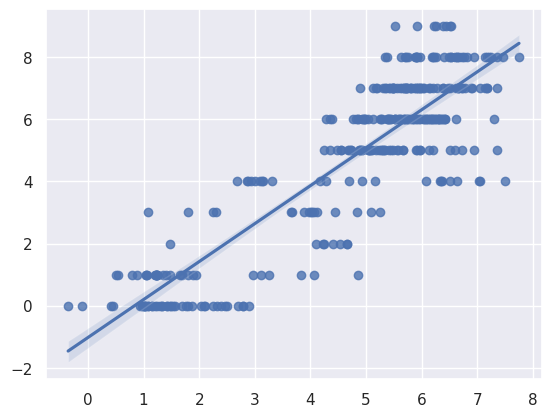

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

sns.regplot(x=test_preds, y=test_flower_counts)
plt.show()

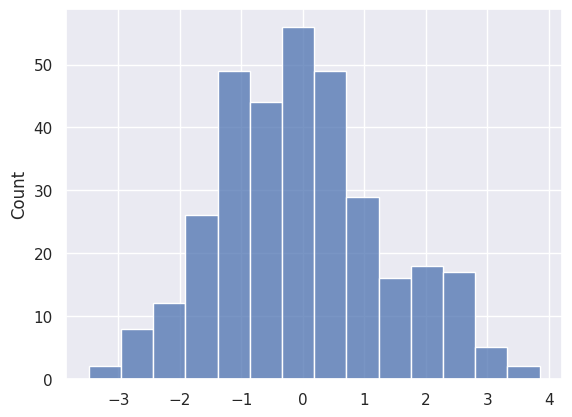

In [14]:
sns.histplot(x=errors)